# Oja's Rule


---
*  Formulated by Dr. Erkki Oja in 1982
* Oja's learning rule is a mathematical formalization of the Hebbian learning rule, such that over time the neuron actually learns to compute a principal component of its input stream. 
*   Oja's rule is the solution of the major limitation that is posed in Hebbian rule i.e there is no such parameter in Hebbian rule that limits the growth of the weighted values over time. So, in result the value of weight is bound to reach large hypothetical values.
* In order to put a control in the growth of weighted values, a equation is subtracted from the Hebbian rule to limit the growth of neural connection. That equation or term is known as "The Forgetting Term".
Dr. Oja suggested that "The Forgetting Term" should be proportional to both the output of Hebbian rule and the corresponding weight.





The following code is an example of using an associative node with Hebbian learning and weight decay(Oja's Rule) to perform PCA.





### Simulation

---

* First, we will import necessary libraries that we will be using in the following simulation.

* We have used **math** module for some universal mathematical constants. **Numpy** is used for basic mathematical and array operations. **Matplotlib** library is used for plotting the various outputs of this simulation.

In [ ]:
#Linear associator with Hebb and weight decay: PCA a la Oja

import numpy as np
import math
import matplotlib.pyplot as plt




*   **a** is the rotation angle here which is 30°. We will be rotating our data points by 30° with respect to x-axis.
*   **w** is the arbitary initial weight matrix.
* **rot** is the rotation matrix. It will be used to generate training examples
* **w_traj** is the data bin where we will be storing the trajected values of weight that will be generated in the later parts of the code.



In [ ]:
a=-math.pi/6 
w=np.array([[0.1],[0.4]])                                                       #(arbitrary) starting value
rot=np.array([[math.cos(a),math.sin(a)],[-math.sin(a),math.cos(a)]])            #rotation matrix
w_traj=np.zeros((2, 1000), dtype = "float64")                                   #data bin for the trajectory



*   The training is done over 1000 training examples in a **for** loop.
* **rand** generates random gaussian data points in a 2-D matrix.
*   In each of the iteration, a new training point is generated and stored in **rPre**. To make the data evenly spread out, we have formulated the data points with standard deviation of 4 in one specified direction (i.e 30° with x-axis) and standard deviation of 1 in other remaning direction.
*The new data points generated in **rPre** are plotted.
* The postsynaptic value is calculayed and stored in **rPost**. These post-synaptic values will be used in Oja's learning rule with learning rate of 0.1.
* We, then, store the weighted values in **w_traj** and plot the weight trajectory.
* The trajectory of the weights is plotted with a red line, while the
end vector of the weight is plotted with a thick dotted black line.
                

              

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Training a population node with Oja’s rule')

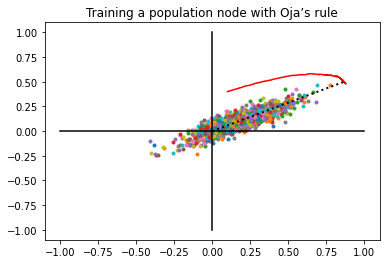

In [ ]:
#Training


%matplotlib inline
for i in range(0,1000):
  rand=np.random.normal((2, 1))-1       #Creating a random gaussian distribution
  num=np.array([[4],[1]]) 
  x=[a*b for a,b in zip(rand,num)]      #element wise multiplication of matrix
  rPre=0.05*np.array(x)
  rPre=np.matmul(rot, rPre)             #training examples               
  plt.plot(rPre[0], rPre[1], ".")       #plot training point
  w_t=np.transpose(w)                   #transpose matrix
  rPost=np.matmul(w_t, rPre)            #network update
  w=w+0.1*rPost*(rPre-rPost*w)          #Hebbian training
  w_traj[:,i]=w[:,0]                    #recording of weight history



#Plotting the results
plt.plot(w_traj[0,:],w_traj[1,:],"r")
plt.plot([0,w[0]],[0,w[1]],":k",linewidth=2)
plt.plot([-1,1],[0,0],"k")
plt.plot([0,0],[-1,1],"k")
plt.title("Training a population node with Oja’s rule")


References:


1.   [Scholarpedia](https://www.scholarpedia.org/article/Oja_learning_rule) 
2.   Fundamentals of Computational Neuroscience (2nd Edition) by Thomas P. Trappenberg

